In [1]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt

plotting.setup_mpl()

In [2]:
### Loading Daniel Ricciardo's Qualifying Lap in 2018
dr = ff1.get_session(2018, 'Mexico', 'Q')
dr.load()

api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for Mexican Grand Prix - Qualifying [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api         WARNING 	Driver 14: Ignoring late data for a previously processed lap.The data may contain errors (previous: 8; current 9)
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching r

In [3]:
### Loading Charles Leclerc's Qualifying Lap in 2019
cl = ff1.get_session(2019, 'Mexico', 'Q')
cl.load()

core           INFO 	Loading data for Mexican Grand Prix - Qualifying [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['33', '16', '5', '44', '23', '77', '55', '4', '26', '10', '11', '27', '3', '7', '99', '18', '20', '8', '63', '88']


In [4]:
lec_lap = cl.laps.pick_driver('LEC').pick_fastest()
ric_lap = dr.laps.pick_driver('RIC').pick_fastest()

lec_lap = lec_lap.get_car_data().add_distance()
ric_lap = ric_lap.get_car_data().add_distance()

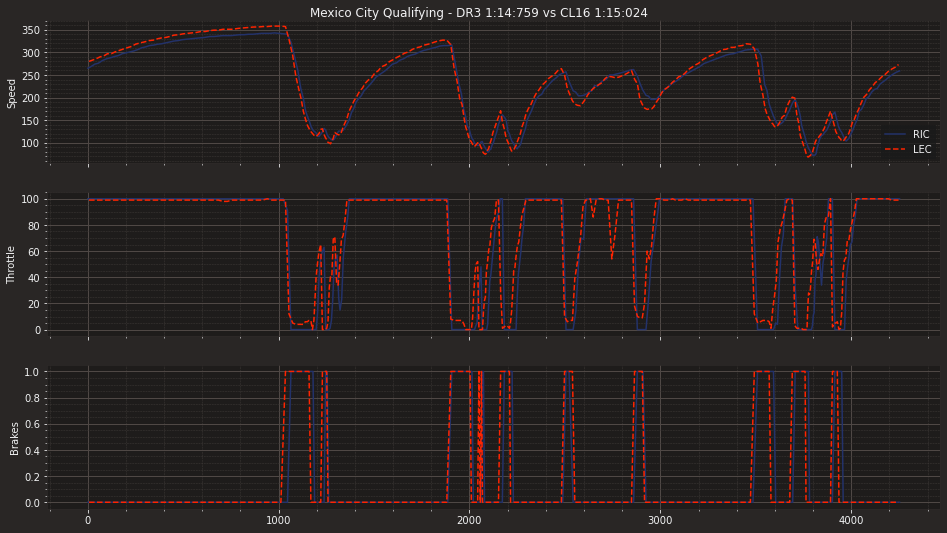

In [5]:
fig, ax = plt.subplots(3, figsize = (16, 9))
fig.suptitle("Mexico City Qualifying - DR3 1:14:759 vs CL16 1:15:024", y=0.9)

ax[0].plot(ric_lap['Distance'], ric_lap['Speed'], color='#23326A', label='RIC')
ax[0].plot(lec_lap['Distance'], lec_lap['Speed'], color='#FF2400', linestyle='dashed', label='LEC')
ax[0].set(ylabel='Speed')
ax[0].legend(loc="lower right")

ax[1].plot(ric_lap['Distance'], ric_lap['Throttle'], color='#23326A', label='RIC')
ax[1].plot(lec_lap['Distance'], lec_lap['Throttle'], color='#FF2400', linestyle='dashed', label='LEC')
ax[1].set(ylabel='Throttle')

ax[2].plot(ric_lap['Distance'], ric_lap['Brake'], color='#23326A', label='RIC')
ax[2].plot(lec_lap['Distance'], lec_lap['Brake'], color='#FF2400', linestyle='dashed', label='LEC')
ax[2].set(ylabel='Brakes')

for a in ax.flat:
    a.label_outer()
    
plt.show()

In [6]:
fig.savefig('Mexico City Qualifying - 2018 DR3 vs 2019 CL16.png', dpi = 600)